In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/movie-review-sentiment-analysis-kernels-only/test.tsv
/kaggle/input/movie-review-sentiment-analysis-kernels-only/train.tsv
/kaggle/input/movie-review-sentiment-analysis-kernels-only/sampleSubmission.csv


# 01 Frame the Problem

Problem statement link :https://www.kaggle.com/c/movie-review-sentiment-analysis-kernels-only/overview

# 02 Obtain the data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv('../input/movie-review-sentiment-analysis-kernels-only/sampleSubmission.csv', sep=",")
df2 = pd.read_csv('../input/movie-review-sentiment-analysis-kernels-only/train.tsv', sep="\t")
df3 = pd.read_csv('../input/movie-review-sentiment-analysis-kernels-only/test.tsv', sep="\t")


# 03 Analyze The data

In [4]:
df1.head(5)

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [5]:
df2.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [6]:
df3.head(5)

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
PhraseId      66292 non-null int64
SentenceId    66292 non-null int64
Phrase        66292 non-null object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [9]:
df2['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [10]:
df2[df2['Sentiment']==1]['Phrase'].head(3)

0     A series of escapades demonstrating the adage ...
33    the gander , some of which occasionally amuses...
47         but none of which amounts to much of a story
Name: Phrase, dtype: object

In [11]:
df2.loc[df2.SentenceId ==2]

,PhraseId,SentenceId,Phrase,Sentiment
63,64,2,"This quiet , introspective and entertaining in...",4
64,65,2,"This quiet , introspective and entertaining in...",3
65,66,2,This,2
66,67,2,"quiet , introspective and entertaining indepen...",4
67,68,2,"quiet , introspective and entertaining",3
68,69,2,quiet,2
69,70,2,", introspective and entertaining",3
70,71,2,introspective and entertaining,3
71,72,2,introspective and,3
72,73,2,introspective,2


In [12]:
#regular expression 
import re 

#regular expression for the removal of name tags and the emoticons from tweets.
def process(Phrase):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",Phrase.lower()).split())

In [13]:
#Applying the Process function to the given Train Data
df2['Newphrase']= df2['Phrase'].apply(process)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

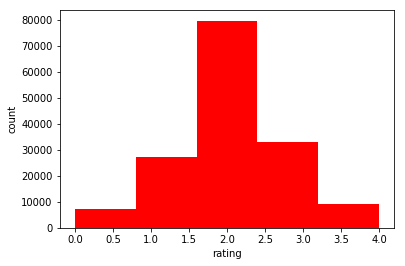

In [15]:
z = df2['Sentiment']
plt.hist(z, bins=5,color='Red')
plt.ylabel('count')
plt.xlabel('rating')
plt.show()

# 04 Feature Enginnering

In [16]:
df2.head(5)

,PhraseId,SentenceId,Phrase,Sentiment,Newphrase
0,1,1,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...
1,2,1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series


In [17]:
#df2.drop('Phrase',inplace=True,axis=1)

In [18]:
#df2.drop('PhraseId', inplace=True,axis=1)

# 05 Model Selection

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 5 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
Newphrase     156060 non-null object
dtypes: int64(3), object(2)
memory usage: 6.0+ MB


# 1st model

In [21]:
count_vect = CountVectorizer(stop_words='english',ngram_range=(1,3),analyzer='word')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [22]:
#splitting the data into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(df2["Newphrase"],df2["Sentiment"],
                                                    test_size = 0.2, random_state = 20)

x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [23]:
print(x_train_counts.shape)
print(x_train_tfidf.shape)
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(124848, 128658)
(124848, 128658)
(31212, 128658)
(31212, 128658)


In [24]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss="modified_huber", penalty="l1")
model.fit(x_train_tfidf,y_train)
predictions = model.predict(x_test_tfidf)

In [25]:
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score, confusion_matrix

In [26]:
accuracy_score(y_test,predictions)

0.5523836985774702

In [27]:
f1_score(y_test,predictions, average ='micro')

0.5523836985774702

In [28]:
recall_score(y_test,predictions, average = 'micro')

0.5523836985774702

In [29]:
precision_score(y_test,predictions,average = 'micro')

0.5523836985774702

# 2nd model

In [30]:
#different classification modesls being used
from sklearn.svm import LinearSVC

model_svc = LinearSVC(C=2.0,max_iter=500,tol=0.0001,loss ='hinge')
model_svc.fit(x_train_counts,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=2.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=500, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [31]:
predict_svc = model_svc.predict(x_test_counts)

In [32]:
f1_score(y_test,predict_svc, average = 'micro')

0.645520953479431

In [33]:
recall_score(y_test,predict_svc, average = 'micro')

0.645520953479431

In [34]:
accuracy_score(y_test,predict_svc)

0.645520953479431

# 06 Tune the model

In [35]:
#optimizing parameters
from sklearn.model_selection import GridSearchCV


params = {"tfidf__ngram_range": [(1, 2), (1,3), (1,4)],
          "svc__C": [.01, .1, 1, 10, 100]}

clf = Pipeline([("tfidf", TfidfVectorizer(sublinear_tf=True)),
                ("svc", LinearSVC(loss='hinge'))])

gs = GridSearchCV(clf, params, verbose=4, n_jobs=-1)
gs.fit(x_train,y_train)
print("Best Estimator = ", gs.best_estimator_)
print("Best Score = ",gs.best_score_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 12.2min finished


Best Estimator =  Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
predicted = gs.predict(x_test)

In [37]:
predicted

array([2, 2, 2, ..., 3, 3, 3])

In [38]:
f1_score(y_test,predicted, average = 'micro')

0.6543637062668205

In [39]:
recall_score(y_test,predicted, average = 'micro')

0.6543637062668205

In [40]:
precision_score(y_test,predicted, average = 'micro')

0.6543637062668205

In [41]:
accuracy_score(y_test,predicted)

0.6543637062668205

# 07 Predict on new cases

In [42]:
df3['Newphrase']= df3['Phrase'].apply(process)

In [43]:
#df3.drop('Phrase',inplace=True,axis=1)

In [44]:
#df3.drop('PhraseId', inplace=True,axis=1)

In [45]:
df3.head(5)

,PhraseId,SentenceId,Phrase,Newphrase
0,156061,8545,An intermittently pleasing but mostly routine ...,an intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...,an intermittently pleasing but mostly routine ...
2,156063,8545,An,an
3,156064,8545,intermittently pleasing but mostly routine effort,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine,intermittently pleasing but mostly routine


In [46]:
predicted = gs.predict(df3['Newphrase'])

In [47]:
final_predict = pd.DataFrame(predicted,columns=['Sentiment'])
result = pd.DataFrame(df3['PhraseId'])
result = pd.concat([result,final_predict],axis=1)
result.to_csv('Submission.csv',index=False)

In [48]:
predicted

array([3, 3, 3, ..., 1, 1, 1])

In [49]:
result

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,3
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,1
66290,222351,1


In [50]:
result['Sentiment'].value_counts()

2    41600
3    12991
1     8048
4     2313
0     1340
Name: Sentiment, dtype: int64